# Estimating the Profitablity of Discounts - Casual Inference:

## Problem Statement:
Causal inference is a relatively new field of data science and, because of that, there are still lots of misunderstandings around it, especially on how to use it. Data scientists are often trained in the art of predictive models. That is, given a well-defined target Y and a set of features X, we can leverage a series of algorithms (gradient boosting, random forests, neural networks) to fit a model that can accurately predict Y from X, E[Y|X].

But not all business problems can be framed as prediction problems. Many times, business is interested in influencing or changing rather than predicting a metric like sales, churn, or NPS. Here is where causal inference comes into play. We can leverage it to understand how or if we can intervene in the business to change some desired metric.
Our job is to help we will help an e-commerce company that is struggling with their discounting policy. They wish to use discounts to boost sales and hence, profits. But while discounting does boost sales in the long run, it has a direct negative impact on profits: whatever you give as a discount you don’t make as earnings. The e-commerce company states that each customer’s profitability is given as follows:
$
Profit_i = Sales_i * 0.05\ - Discount_i
$

So they need to figure out whether discounting boosts sales by a high enough amount to compensate for the direct loss in revenues caused by giving discounts. Notice how they are not interested in predicting profits. Rather, they wish to know the causal impact of discount on profits. If it’s positive, then discounting is worth it.



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.grid'] = False

## 1: Getting Familiar with the Data:

In [39]:
data = pd.read_csv(
    '/content/non_rand_discount.csv',
    delimiter=';'
)
data.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,...,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure,sales_prediction_bins,sales_prediction
0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,3368.64,US$ 125.0,40.06,40,1.0,MA,6,8,1351.024765
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2133.10,US$ 75.0,29.52,36,0.0,MG,10,4,1035.580387
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2001.62,US$ 50.0,48.08,34,0.0,RJ,7,3,992.401825
3,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,1461.96,US$ 10.0,61.64,31,0.0,BA,7,1,919.720735
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,...,0.0,2743.72,US$ 100.0,34.44,32,1.0,PB,6,6,1176.485681


In [40]:
data.dtypes

spend_1m_baby              int64
spend_2m_baby              int64
spend_3m_baby              int64
spend_4m_baby              int64
spend_5m_baby              int64
spend_6m_baby            float64
spend_1m_clothes           int64
spend_2m_clothes         float64
spend_3m_clothes         float64
spend_4m_clothes         float64
spend_5m_clothes         float64
spend_6m_clothes         float64
spend_1m_health            int64
spend_2m_health            int64
spend_3m_health            int64
spend_4m_health            int64
spend_5m_health            int64
spend_6m_health            int64
spend_1m_pet               int64
spend_2m_pet               int64
spend_3m_pet               int64
spend_4m_pet               int64
spend_5m_pet               int64
spend_6m_pet               int64
spend_1m_groceries         int64
spend_2m_groceries         int64
spend_3m_groceries       float64
spend_4m_groceries       float64
spend_5m_groceries       float64
spend_6m_groceries       float64
spend_1m_e

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   spend_1m_baby          15000 non-null  int64  
 1   spend_2m_baby          15000 non-null  int64  
 2   spend_3m_baby          15000 non-null  int64  
 3   spend_4m_baby          15000 non-null  int64  
 4   spend_5m_baby          15000 non-null  int64  
 5   spend_6m_baby          15000 non-null  float64
 6   spend_1m_clothes       15000 non-null  int64  
 7   spend_2m_clothes       15000 non-null  float64
 8   spend_3m_clothes       15000 non-null  float64
 9   spend_4m_clothes       15000 non-null  float64
 10  spend_5m_clothes       15000 non-null  float64
 11  spend_6m_clothes       15000 non-null  float64
 12  spend_1m_health        15000 non-null  int64  
 13  spend_2m_health        15000 non-null  int64  
 14  spend_3m_health        15000 non-null  int64  
 15  sp

In [42]:
data.isnull().sum()

spend_1m_baby               0
spend_2m_baby               0
spend_3m_baby               0
spend_4m_baby               0
spend_5m_baby               0
spend_6m_baby               0
spend_1m_clothes            0
spend_2m_clothes            0
spend_3m_clothes            0
spend_4m_clothes            0
spend_5m_clothes            0
spend_6m_clothes            0
spend_1m_health             0
spend_2m_health             0
spend_3m_health             0
spend_4m_health             0
spend_5m_health             0
spend_6m_health             0
spend_1m_pet                0
spend_2m_pet                0
spend_3m_pet                0
spend_4m_pet                0
spend_5m_pet                0
spend_6m_pet                0
spend_1m_groceries          0
spend_2m_groceries          0
spend_3m_groceries          0
spend_4m_groceries          0
spend_5m_groceries          0
spend_6m_groceries          0
spend_1m_eletronic          0
spend_2m_eletronic          0
spend_3m_eletronic          0
spend_4m_e

In [43]:
data["discount"] = pd.to_numeric(data["discount"].str.split(" ").str[-1])


In [44]:
data['gender'].value_counts()

1.0    6839
0.0    6686
Name: gender, dtype: int64

In [45]:
data['gender']= data['gender'].fillna('2')

In [46]:
data['gender'].value_counts()

1.0    6839
0.0    6686
2      1475
Name: gender, dtype: int64

## 2: Understanding the Treatment Assignment Mechanism:

The profit equation of this company is:
 
$
Profit_i = Sales_i * 5\% - Discount_i
$
 
Now, let's see how discount is correlated with both of these variables. We won't make any causal statements for now.

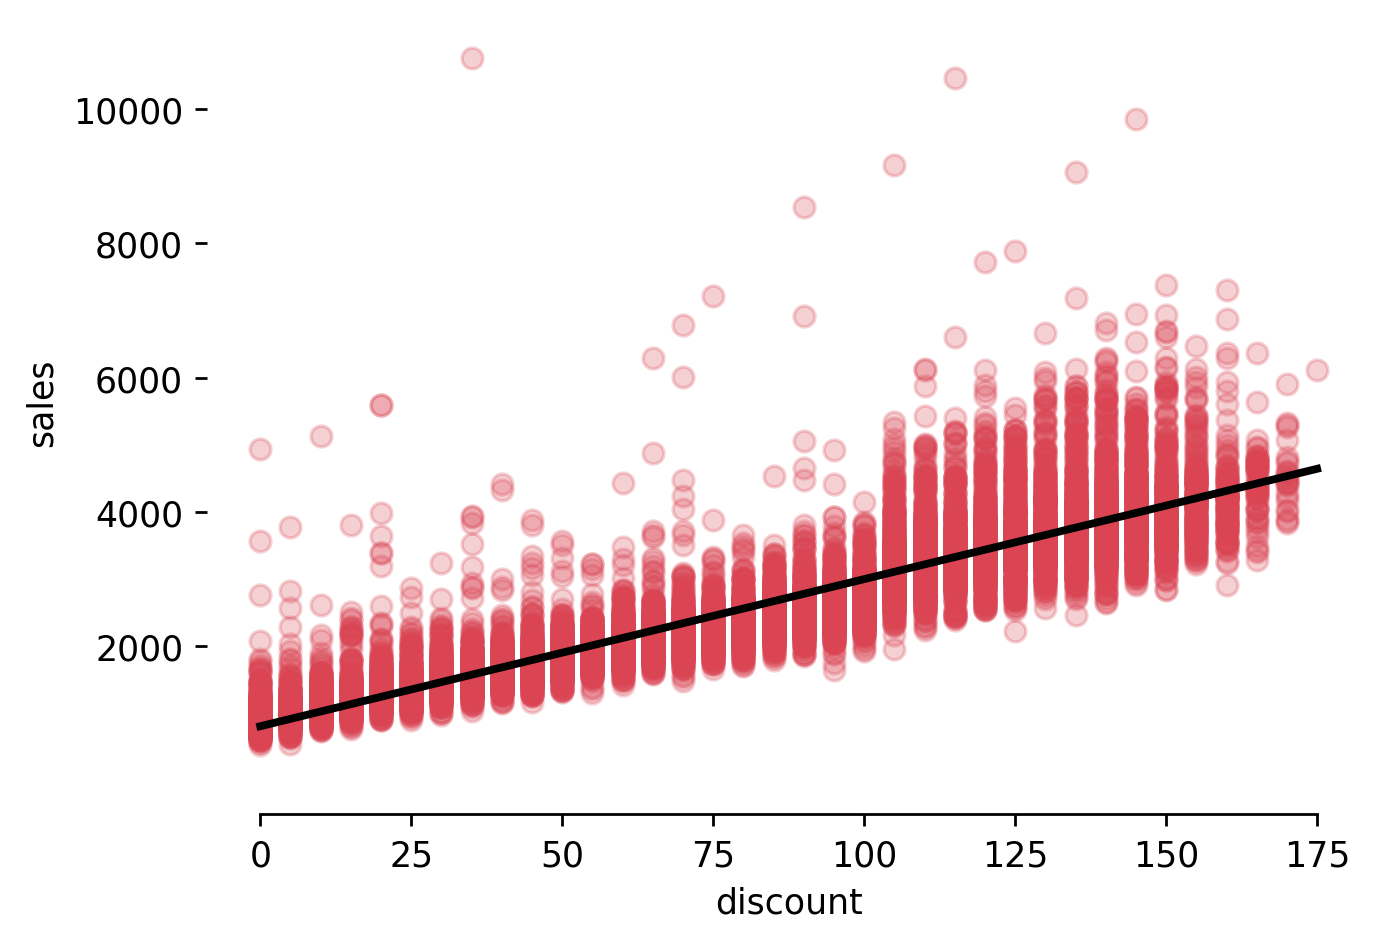

In [47]:
sns.regplot(
    data=data, x='discount', y='sales',
    scatter_kws={'alpha':0.25, 'color':'#da4453'}, color='black'
)
sns.despine(top=True, left=True, right=True,
            offset=10, trim=True)
plt.show()

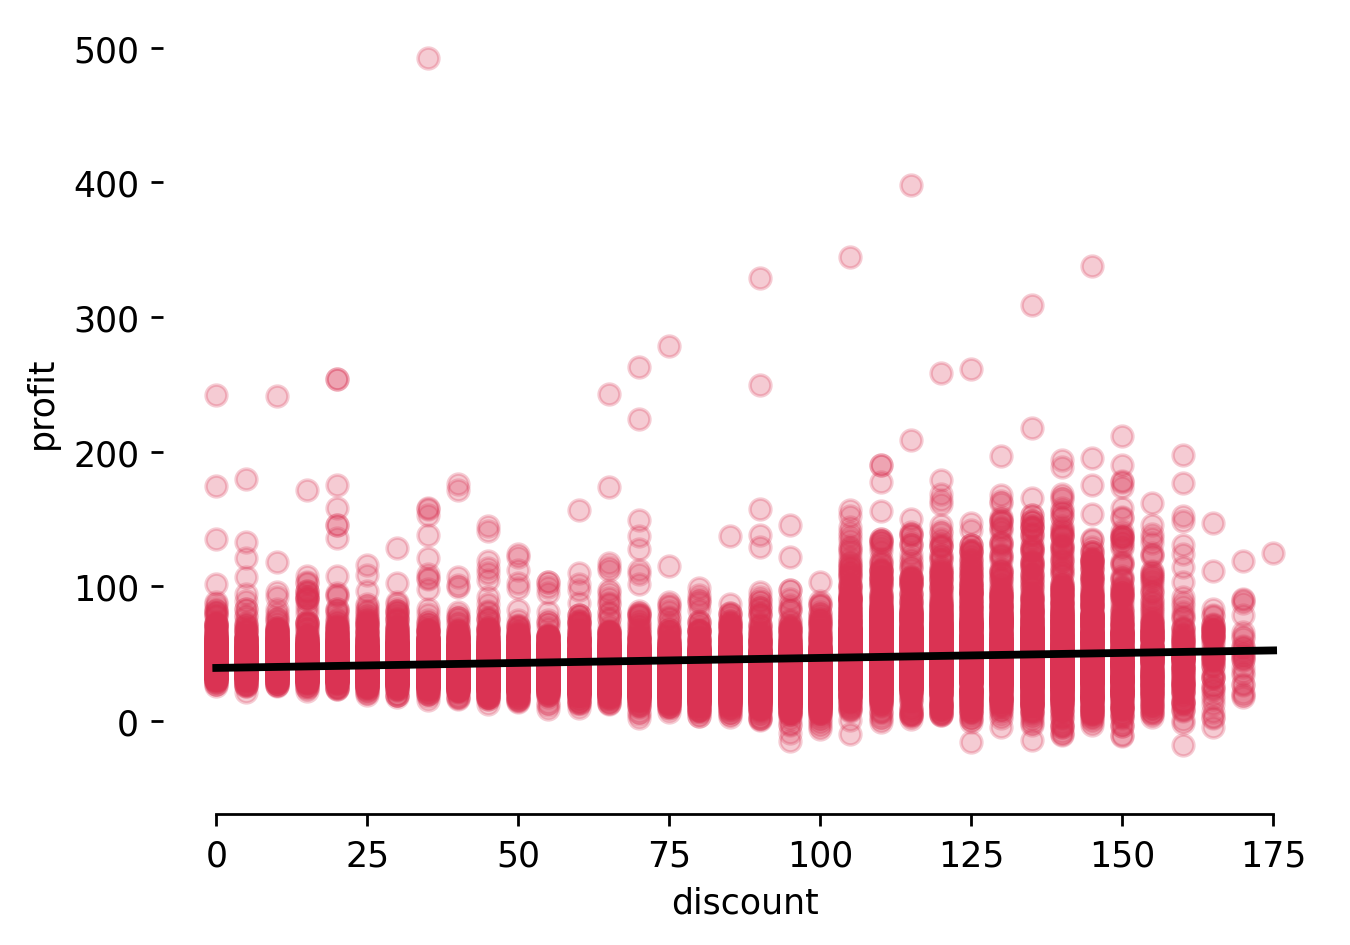

In [48]:
sns.regplot(
    data=data, x='discount', y='profit',
    scatter_kws={'alpha':0.25,'color':'#da3353'}, color='black'
)
sns.despine(top=True, left=True, right=True,
            offset=10, trim=True)
plt.show()

There seems to be a positive correlation between discount and dales and between discount and profit. But we can't make any causal statement yet. For that, we need to check if customers with low discount levels are comparable to those with high discount levels. If that's not the case, it could be that the correlation is spurious. For instance, it could be that those that get more discounts already spend more in the first place, even if they didn't get the discount. 


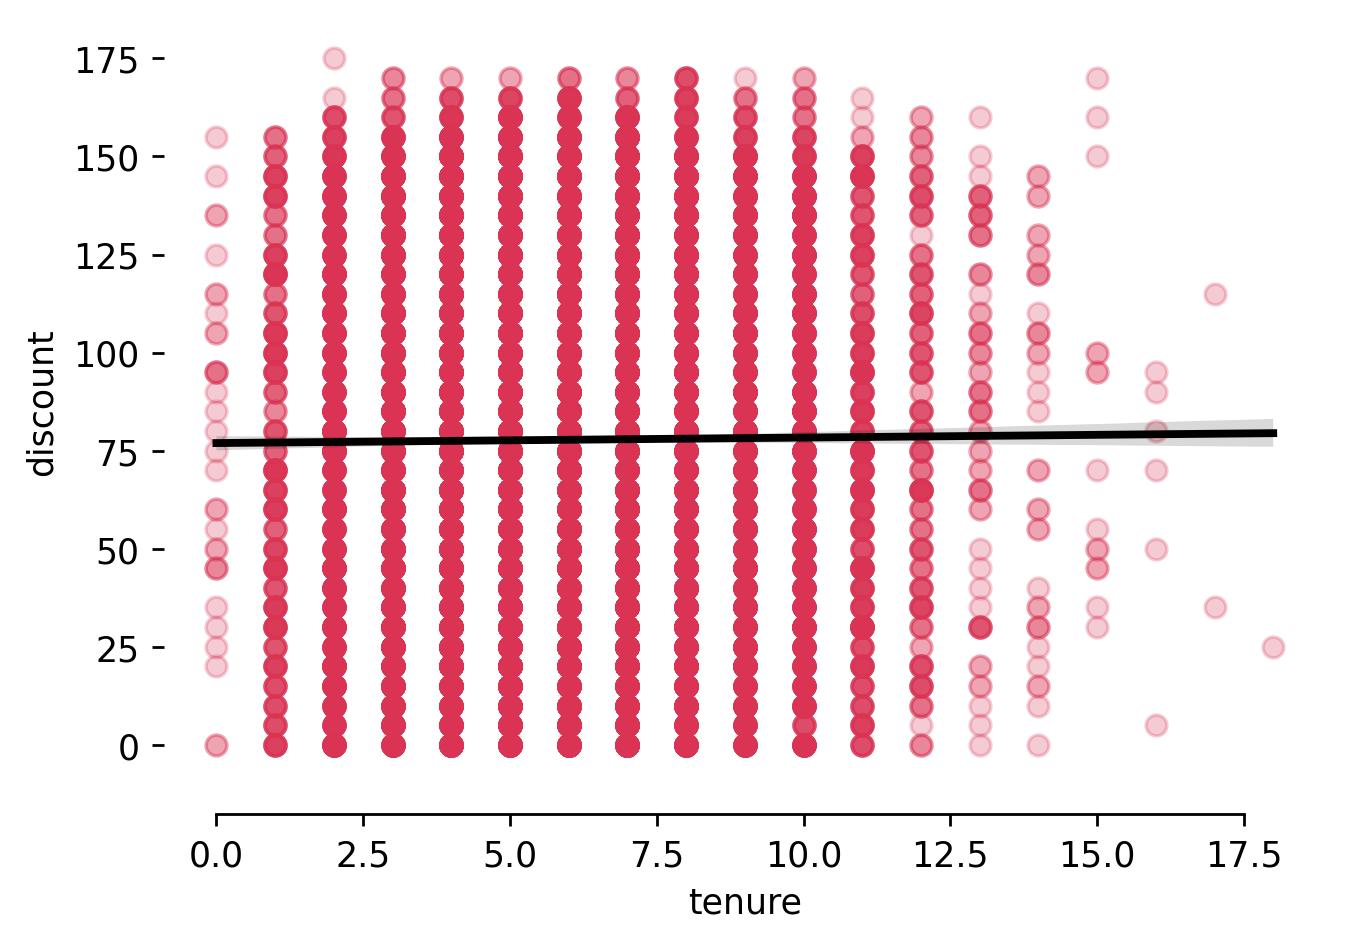

In [83]:
sns.regplot(
    data=data, y='discount', x='tenure',
    scatter_kws={'alpha':0.25,'color':'#da3353'}, color='black'
)
sns.despine(top=True, left=True, right=True,
            offset=10, trim=True)
plt.show()

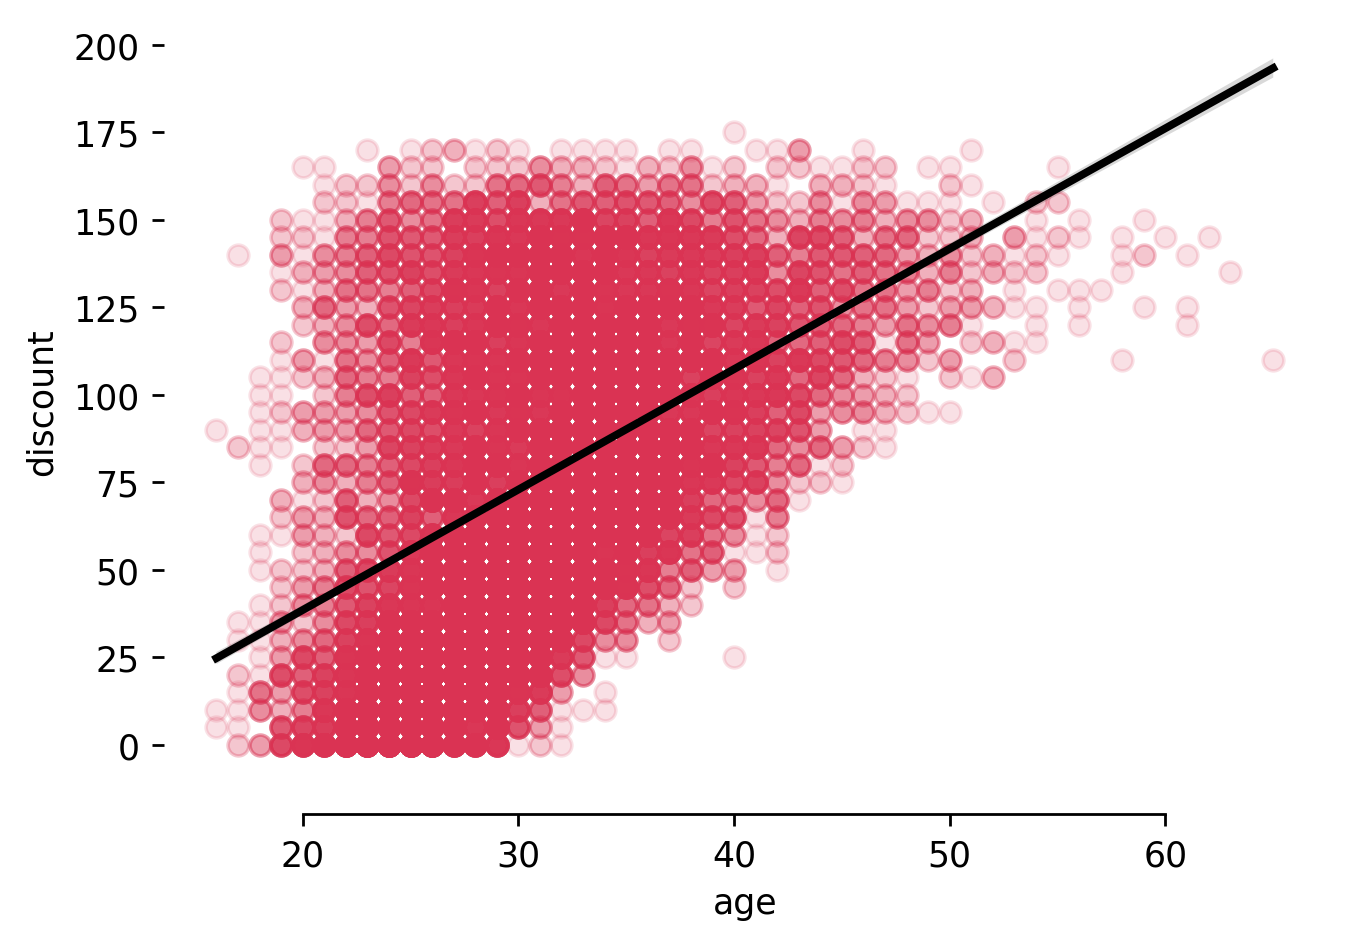

In [49]:
sns.regplot(
    data=data, x='age', y='discount',
    scatter_kws={'alpha':0.15,'color':'#da3353'}, color='black'
)
sns.despine(top=True, left=True, right=True,
            offset=10, trim=True)
plt.show()

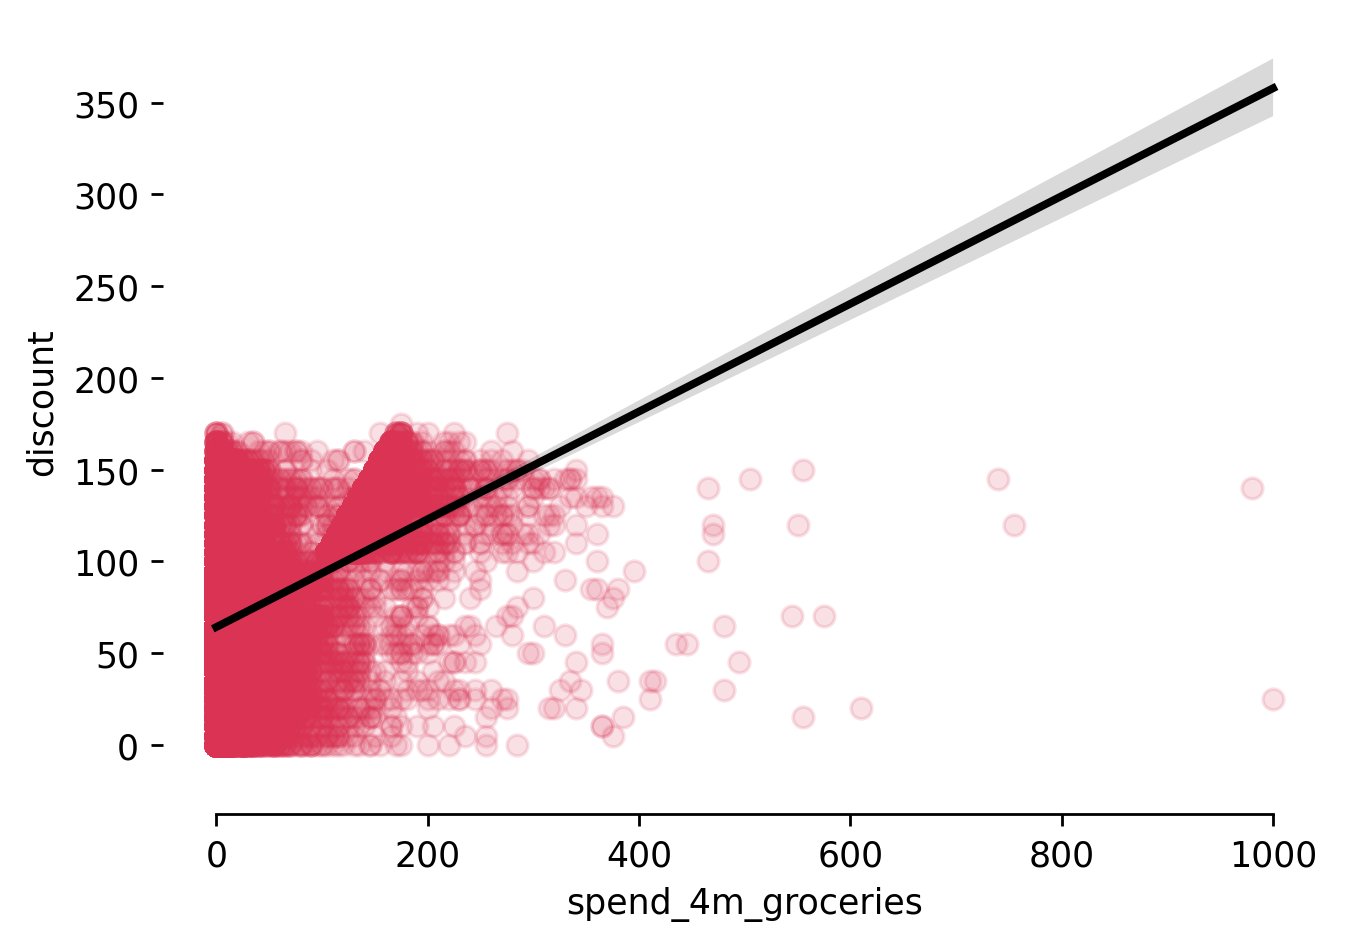

In [84]:
sns.regplot(
    data=data, x='spend_4m_groceries',y='discount',
    scatter_kws={'alpha':0.15,'color':'#da3353'}, color='black'
)
sns.despine(top=True, left=True, right=True,
            offset=10, trim=True)
plt.show()

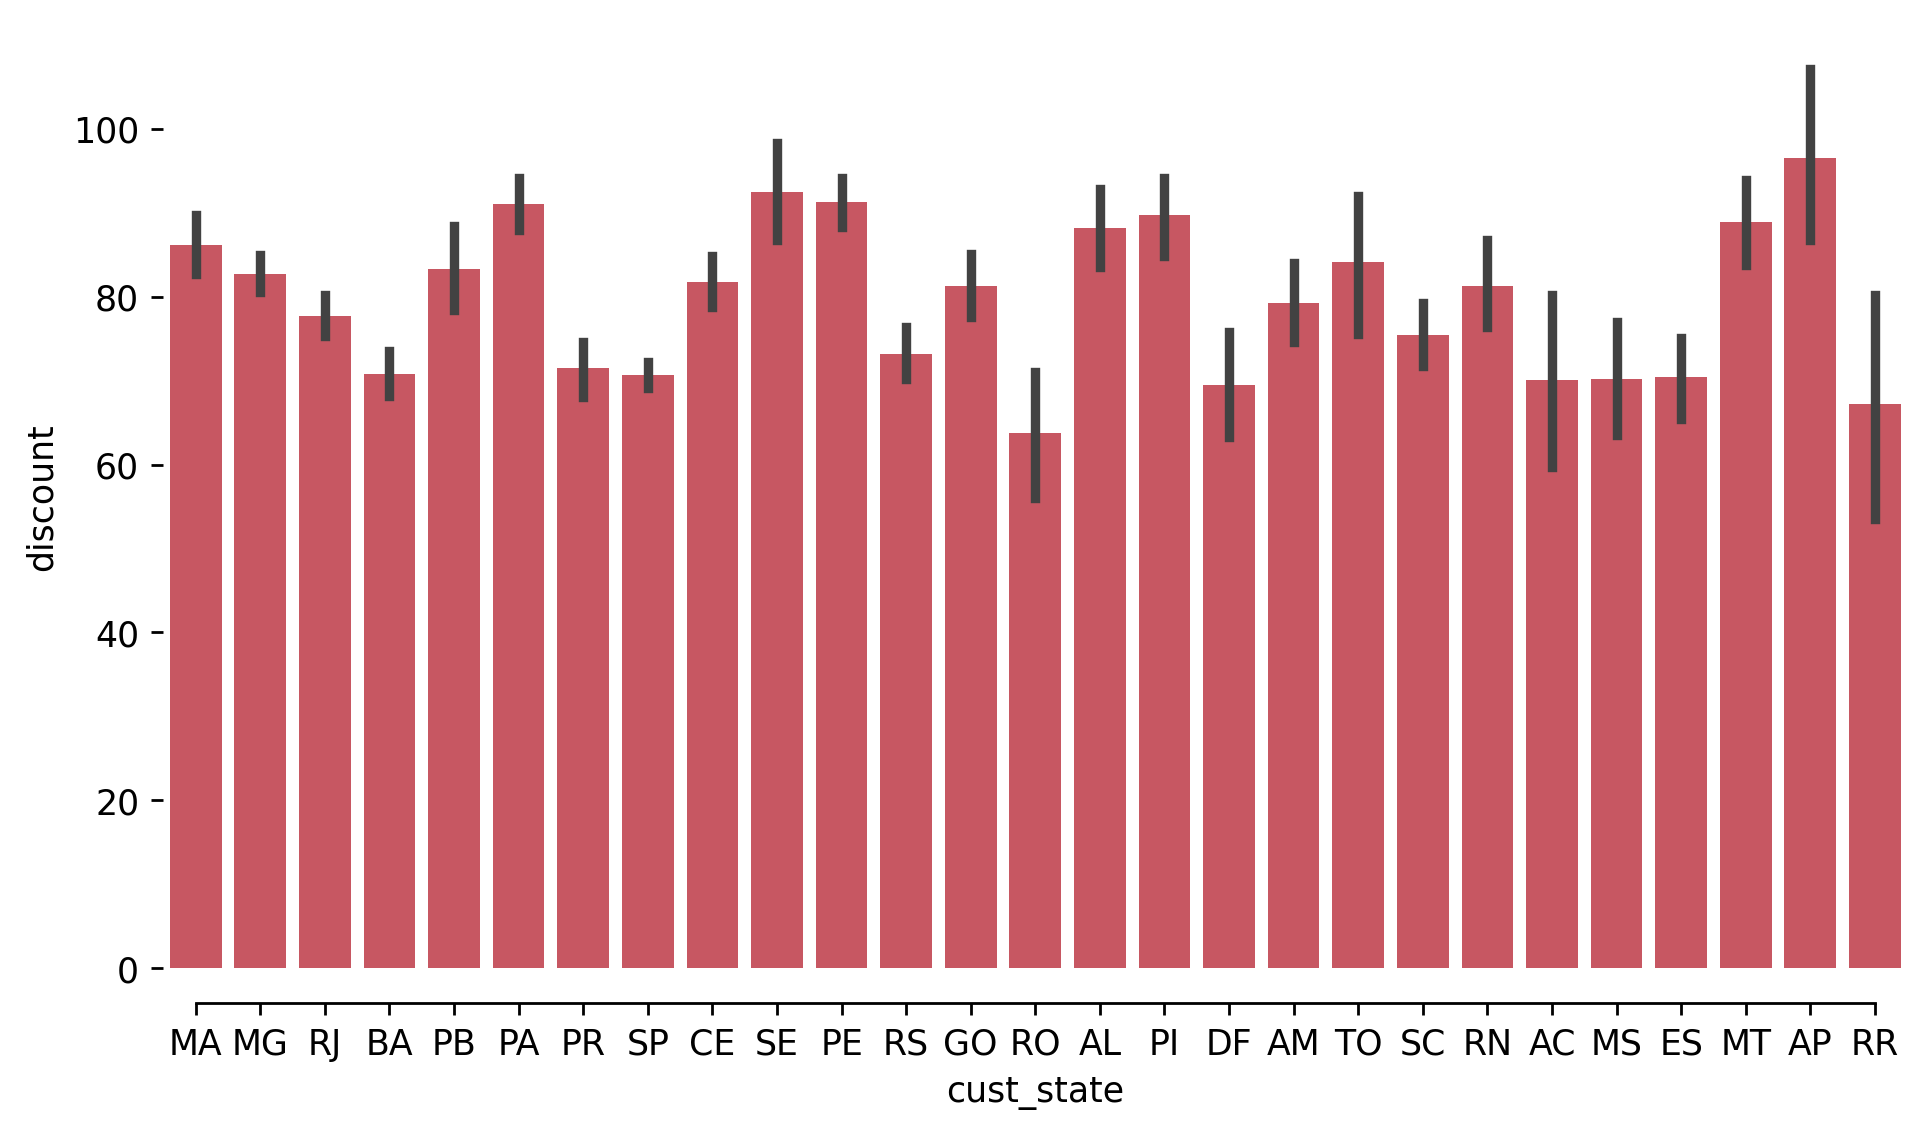

In [50]:
plt.figure(figsize=(9,5))
sns.barplot(data=data, x='cust_state', y='discount',
        color='#da4453')
plt.xticks(rotation=90)
sns.despine(top=True, left=True, right=True,
            offset=10, trim=True)
plt.show()

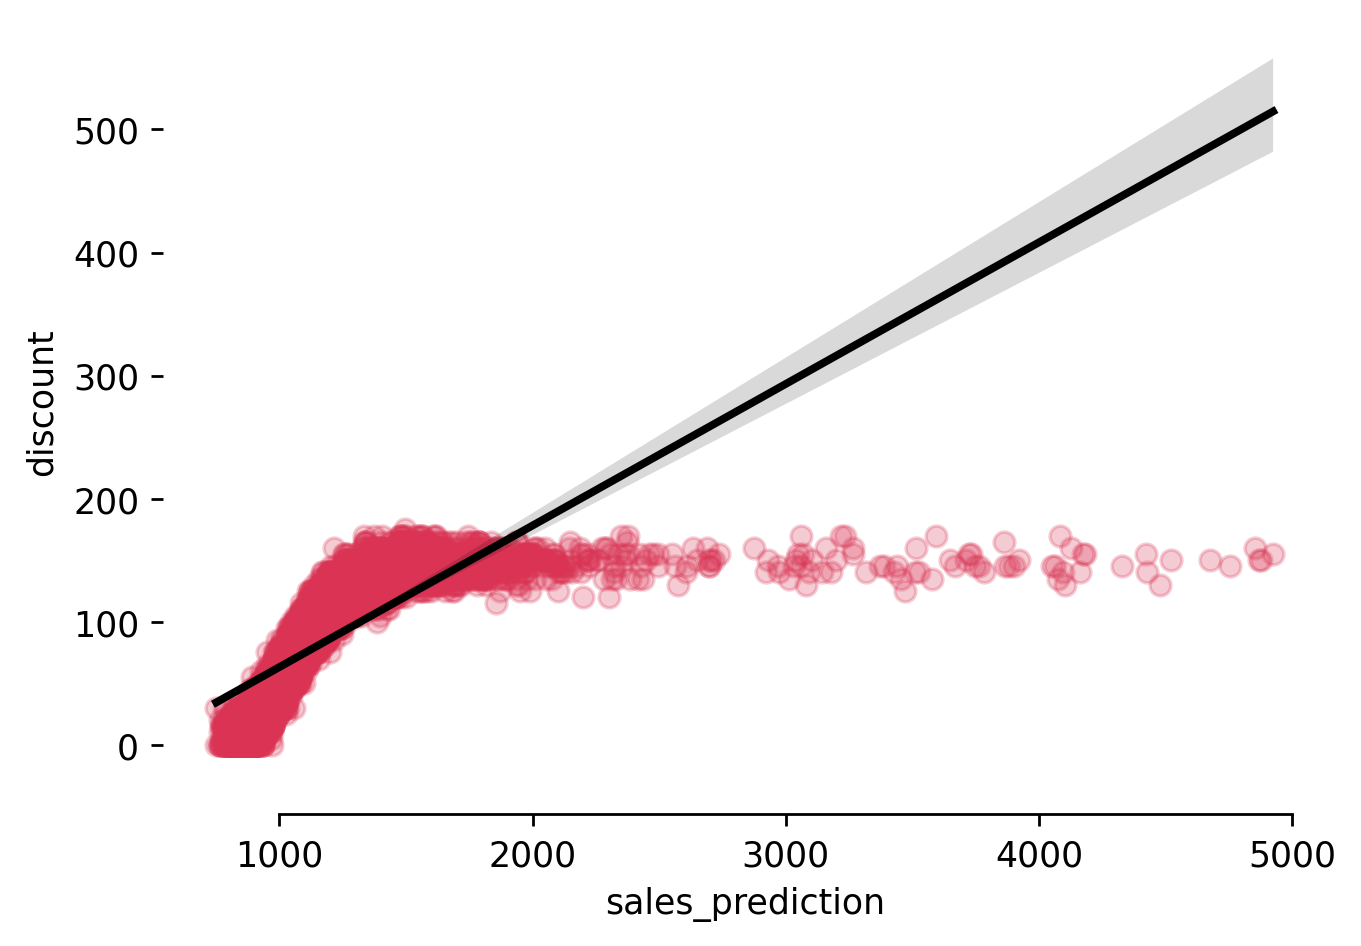

In [51]:
sns.regplot(
    data=data, x='sales_prediction', y='discount',
    scatter_kws={'alpha':0.25,'color':'#da3353'}, color='black'
)
sns.despine(top=True, left=True, right=True,
            offset=10, trim=True)
plt.show()

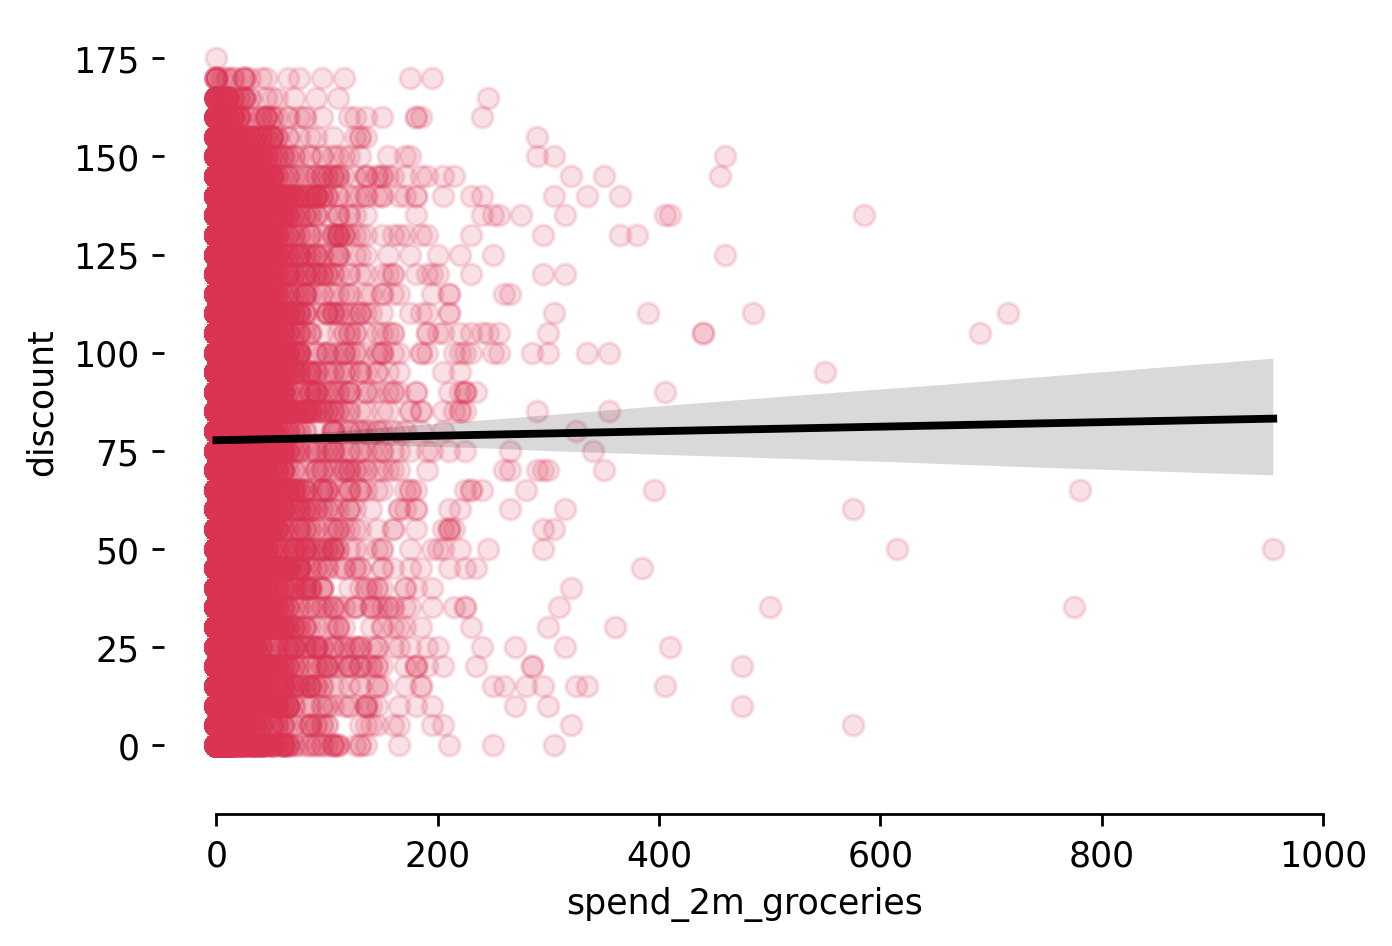

In [52]:
sns.regplot(
    data=data, x='spend_2m_groceries', y='discount',
    scatter_kws={'alpha':0.15,'color':'#da3353'}, color='black'
)
sns.despine(top=True, left=True, right=True,
            offset=10, trim=True)
plt.show()

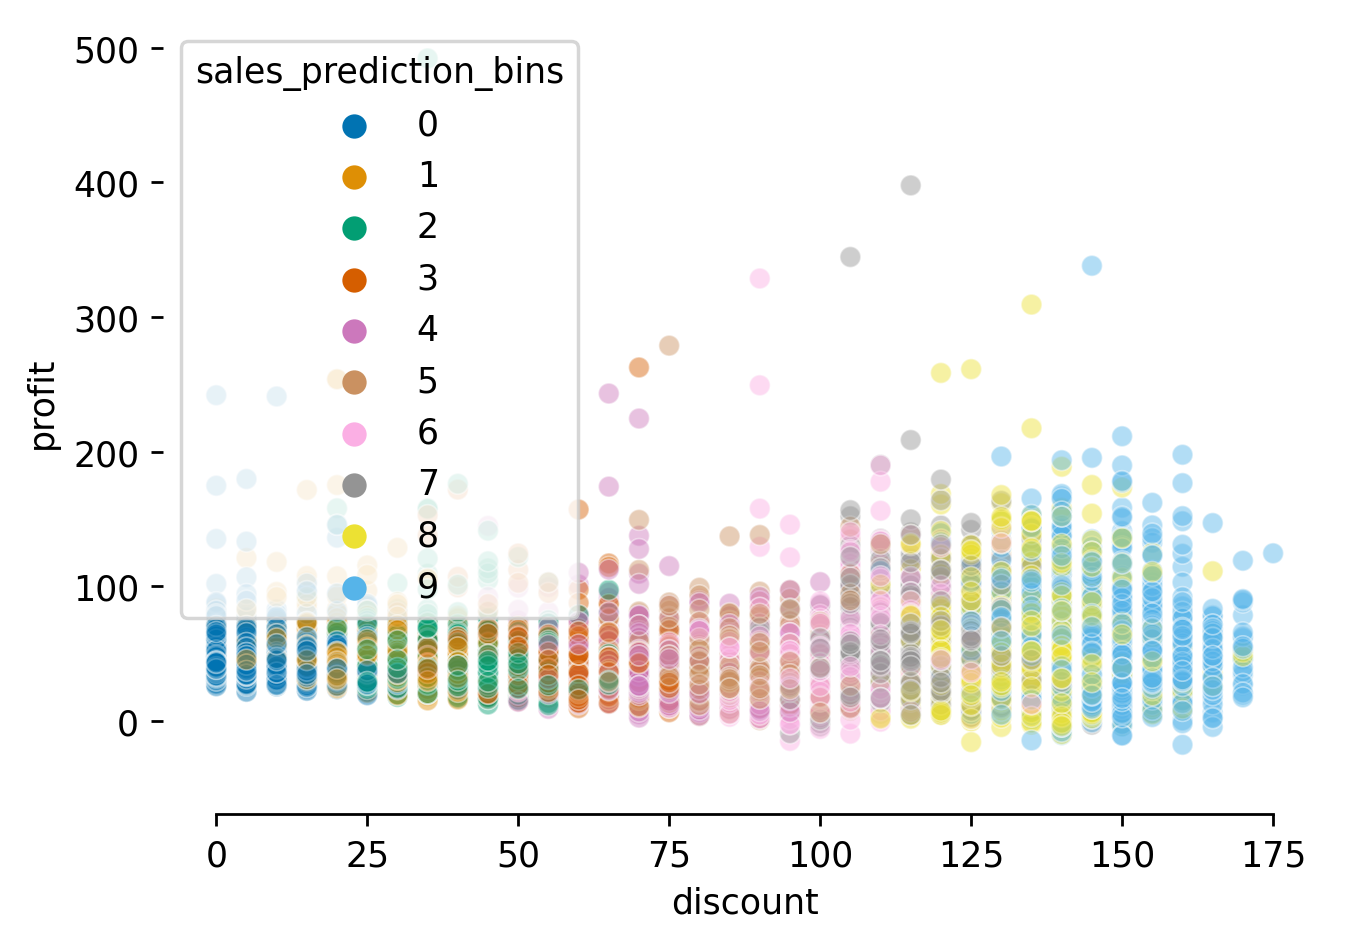

In [53]:
sns.scatterplot(
    data = data, x="discount", y="profit", hue="sales_prediction_bins", 
                alpha=0.45, palette='colorblind')
sns.despine(top=True, left=True, right=True,
            offset=10, trim=True)
plt.show()

As we can see, the higher the age, the higher the discount level. Also, the higher the `sales_prediction`, the higher the discount level. This indicates that the company was giving more discounts to those that it predicted to spend more. That's problematic for our causal statements. It means that those with a high discount would have bought more even without the discount. In potential outcome terms
 
$$
E[Profit_0|Discount=High] > E[Profit_0|Discount=Low]
$$
 
that is, those with high discount levels, had they received a low discount level (potential outcome 0) would still generate more profit that those that received a low discount level.


## 3: Confounding Bias:


In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import graphviz as gv

In [55]:
model = smf.ols('sales~discount',
                data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,804.5246,7.790,103.274,0.000,789.255,819.794
discount,21.9248,0.087,251.815,0.000,21.754,22.095


In [56]:
model = smf.ols('profit~discount',
                data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,39.4217,0.382,103.274,0.000,38.673,40.170
discount,0.0743,0.004,17.419,0.000,0.066,0.083


We can that discount is positively correlated with sales and conidence interval is very far away from zero at **21.7, 22.09** which concludes that there is statistical significance. On an average we can expect the sales to increase in discount to be assosiated with 21 sales increase.



In [57]:
model = smf.ols('discount~sales_prediction+age',
                data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-102.3049,1.299,-78.761,0.000,-104.851,-99.759
sales_prediction,0.1011,0.001,119.864,0.000,0.099,0.103
age,2.1037,0.038,55.864,0.000,2.030,2.178


**sales_predictions** and **age** can be seen increasing with increase in dicount. If sales prediction stays the same then we can expect the discount to increase in about 2.03.


### Question:
Based on what you know about the potential outcomes of customers with high and low discounts, what can you say about the relationship between discounts and profits? Can we interpret that relationship as causal? If not, why? Identify how the correlation between discount and profitability is different from the causal effect of discount of profitability. Is this bias negative or positive?

### Answer:

Customers who got high discounts would have generated more profits than customer who recieved low discount offers. Hence we can see there is confounding bias.
The bias is caused by **sales_prediction**, meaning higher sales would lead to higher discount and ultimately higher **sales_prediction** would result in higher coutcomes.


### Question:
Since discounts were not randomly assigned and potential outcome Y(0) is different across different discount levels, we can say that there is confounding bias in the relationship between discounts and profits. Draw a causal graph that is in line with our understanding of the bias in this relationship.
### Answer:
Confounders are variables that cause both the treatment and the outcome. We can't check for the existence of confounders just by looking at the data, but we can leverage our intuition about how the world works. For instance, if we know from previous steps that the higher the age, the higher the discount. We also know that older customers tend to have more money than younger ones. Hence, the higher the age, the higher the income and, probably, the higher the sales and profit. Age is thus a possible confounder because it causes discounts to go up and sales to go up. Another potential confounder is sales predictions. So, the higher the sales prediction, the higher the discount and also the higher de sales and profit. Hence, sales prediction is probably a confounder. 
$$
BIAS = E[Profit_0|Discount=High] - E[Profit_0|Discount=Low]
$$
 
If we were to plot the causal graph with age, sales prediction, discount and profit, we would probably have something like this:

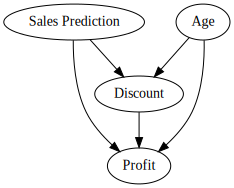

In [58]:
g = gv.Digraph()

g.edge("Sales Prediction", "Discount")
g.edge("Age", "Discount")
g.edge("Age", "Profit")
g.edge("Sales Prediction", "Profit")
g.edge("Discount", "Profit")

g

##4: Regression Analysis:


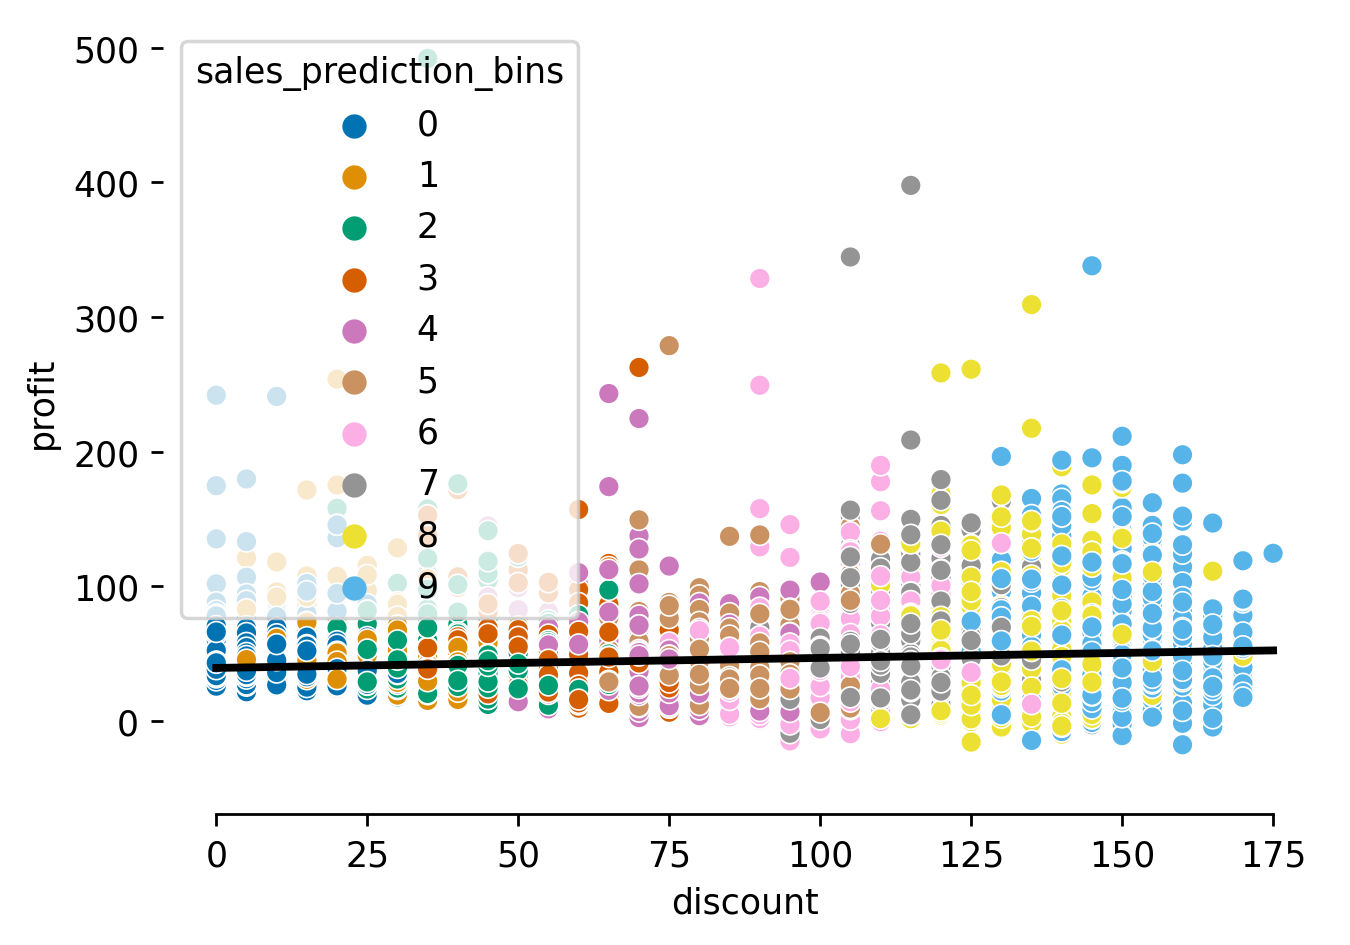

In [60]:
sns.scatterplot(
    data=data, x='discount', y='profit',
    hue='sales_prediction_bins',palette='colorblind'
)
sns.regplot(x='discount',y='profit',
            data=data, scatter=False,
            color='black')
sns.despine(top=True, left=True, right=True,
            offset=10, trim=True)
plt.show()

In [66]:
model_discount = smf.ols("discount~C(sales_prediction_bins)",
        data=data).fit()

df_discount_res = (
    data.assign(
        discount_res = model_discount.resid + \
        data["discount"].mean()))

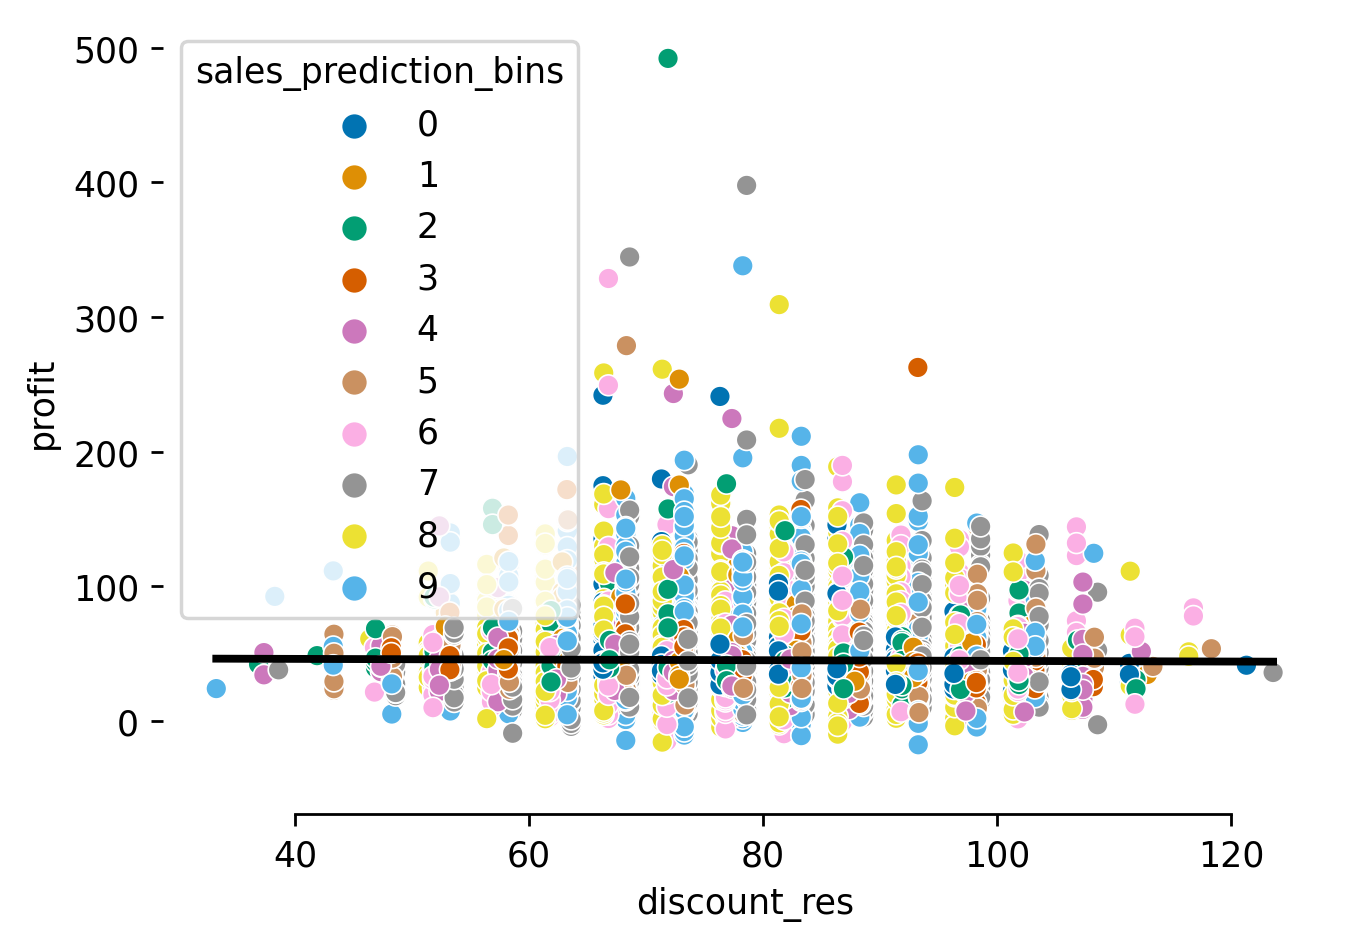

In [69]:
sns.scatterplot(
    data=df_discount_res, x='discount_res', y='profit', 
    hue='sales_prediction_bins', palette='colorblind')
sns.regplot(data=df_discount_res, 
            x='discount_res', y='profit', 
            scatter=False, color='black')
sns.despine(top=True, left=True, right=True,
            offset=10, trim=True)
plt.show()

Once we fit the model to predict discount from sales prediction, get its residuals and plot it against profit we can see that the bias vanishes. It is no longer the case that customers with higher sales predictions have higher discounts (residuals). In other words, looking at the residuals, it is as if discounts were randomly assigned. Also, looking at the plot, we can see that the line is now downward sloping, telling us that the higher the discount, the lower the profit. This residual regression is what we call the debiasing step in FWL theorem.

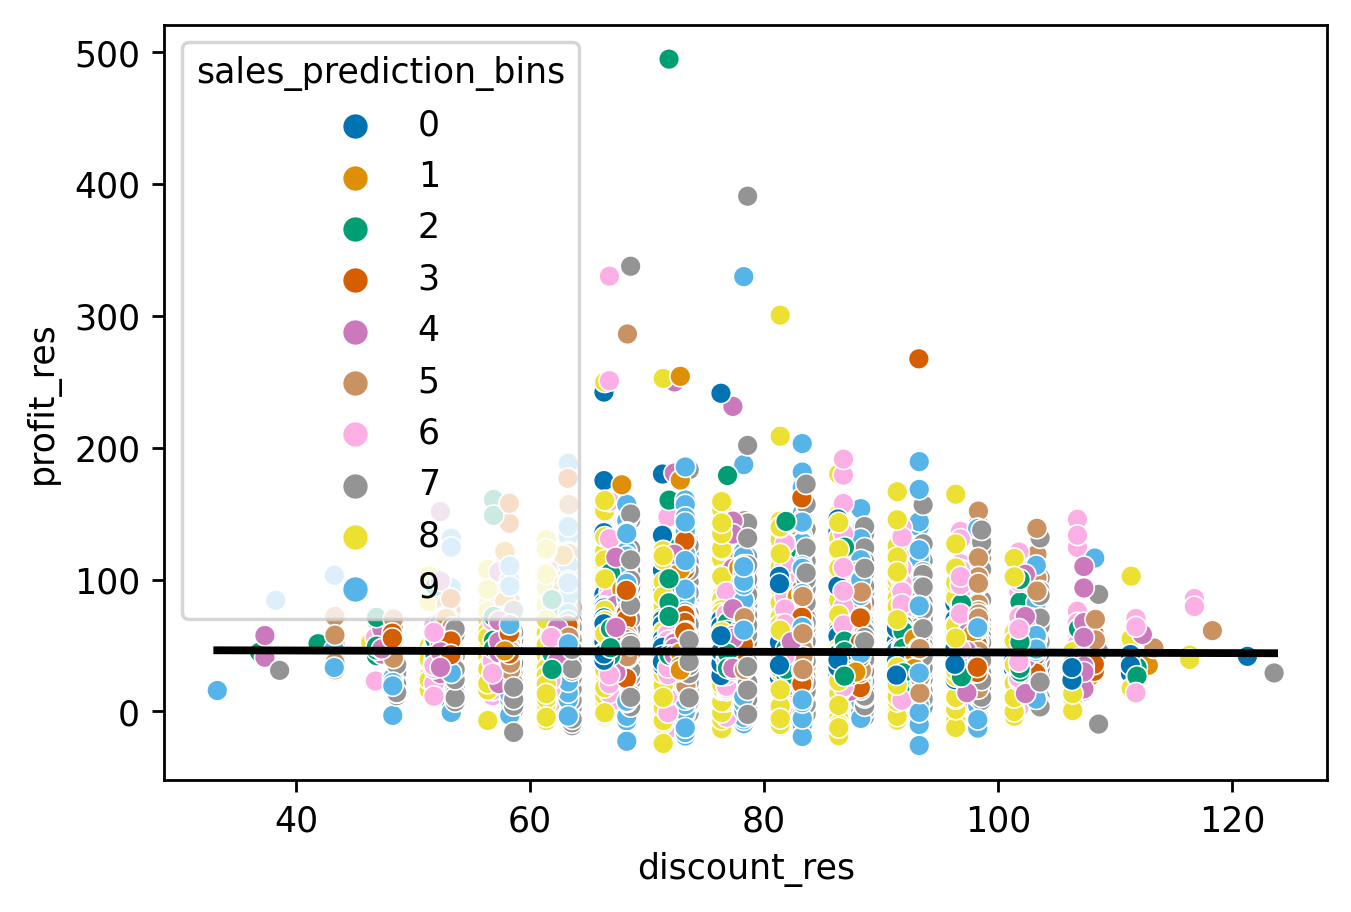

In [70]:
model_profit = smf.ols(
    "profit~C(sales_prediction_bins)",
     data=df_discount_res).fit()

df_profit_res = (
    df_discount_res.assign(
        profit_res = model_profit.resid + \
        df_discount_res["profit"].mean()))

sns.scatterplot(
    data=df_profit_res, x="discount_res", 
    y="profit_res", hue="sales_prediction_bins", 
    palette='colorblind')
sns.regplot(
    data=df_profit_res, 
    x="discount_res", y="profit_res", 
    scatter=False, color='black')

Building a model to predict profit from sales prediction and getting its residuals should not change the slope of the line, but it should reduce the variance in the outcome variable profit. It's very hard to see that here, but if we estimate both's variances, we can see it.

In [71]:
model = smf.ols("profit_res~discount_res", data=df_profit_res).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,47.1222,1.325,35.556,0.000,44.524,49.720
discount_res,-0.0247,0.017,-1.464,0.143,-0.058,0.008


Regressing the residuals of profit on the residuals of discount gives us an estimate about how much we expect profit to increase on average for every unit increase in discount **while holding X** fixed, where X is the set of variables used to get the residuals (`sales_prediction_bins` in our case).  We can see that this coefficient is now negative. We can interpret it like this: while holding sales prediction constant, increasing discount in 1 unit should **decrease** profit by 0.0247. We can interpret this as a causal parameter because we know that `sales_prediction_bins` is the only variable used to determine the discount customer's received. That is, `sales_prediction_bins` is the only confounder and we've adjusted for it. 

In [75]:
model = smf.ols("profit~discount + C(sales_prediction_bins)", 
                data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,45.1995,0.616,73.397,0.000,43.992,46.407
C(sales_prediction_bins)[T.1],0.3418,0.858,0.399,0.690,-1.339,2.023
C(sales_prediction_bins)[T.2],-1.7348,0.964,-1.799,0.072,-3.625,0.156
C(sales_prediction_bins)[T.3],-3.5352,1.102,-3.209,0.001,-5.694,-1.376
C(sales_prediction_bins)[T.4],-4.9727,1.294,-3.842,0.000,-7.510,-2.436
C(sales_prediction_bins)[T.5],-5.4330,1.484,-3.661,0.000,-8.342,-2.524
C(sales_prediction_bins)[T.6],0.9766,1.723,0.567,0.571,-2.400,4.353
C(sales_prediction_bins)[T.7],9.7498,1.921,5.075,0.000,5.984,13.515
C(sales_prediction_bins)[T.8],11.9732,2.187,5.475,0.000,7.687,16.260
C(sales_prediction_bins)[T.9],11.8579,2.393,4.954,0.000,7.167,16.549


Running two different regression models, getting the residuals and running a third regression of the residuals is numerically equivalent to running a multiple linear regression. The reason we did it in steps was twofold: first, to understand what regression is doing under the hood, second, because we will use this linear regression breakdown once we get to double/debiases ML. 
 
Another thing you might notice is that the 95% Confidence Interval of the discount parameter contains zero, so we could argue that the effect is not statistically significant. However, if we add some predictive variables to our model we can reduce some variance, which increases the significance of the discount parameter by a lot.

In [77]:
model = smf.ols("profit~discount + C(sales_prediction_bins) + age", 
        data=data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.0247,0.972,6.200,0.000,4.120,7.929
C(sales_prediction_bins)[T.1],-3.3510,0.798,-4.200,0.000,-4.915,-1.787
C(sales_prediction_bins)[T.2],-7.7562,0.901,-8.604,0.000,-9.523,-5.989
C(sales_prediction_bins)[T.3],-12.1335,1.035,-11.724,0.000,-14.162,-10.105
C(sales_prediction_bins)[T.4],-15.4909,1.217,-12.725,0.000,-17.877,-13.105
C(sales_prediction_bins)[T.5],-17.2340,1.395,-12.355,0.000,-19.968,-14.500
C(sales_prediction_bins)[T.6],-11.4120,1.615,-7.066,0.000,-14.578,-8.246
C(sales_prediction_bins)[T.7],-3.1408,1.798,-1.747,0.081,-6.666,0.384
C(sales_prediction_bins)[T.8],-1.1977,2.043,-0.586,0.558,-5.202,2.807
C(sales_prediction_bins)[T.9],0.3677,2.229,0.165,0.869,-4.001,4.737


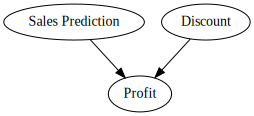

In [79]:
g = gv.Digraph()


g.edge("Sales Prediction", "Profit")
g.edge("Discount", "Profit")

g